In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data[['Name','Age']].isnull().sum()

Name      0
Age     177
dtype: int64

In [12]:
sex_data = data['Sex'].value_counts()
sex_data

Sex
male      577
female    314
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x28fe86b29d0>,
 [Text(-0.9838646807152013, -0.4919454136803953, 'male'),
  Text(0.9838646346559433, 0.4919455057964524, 'female')])

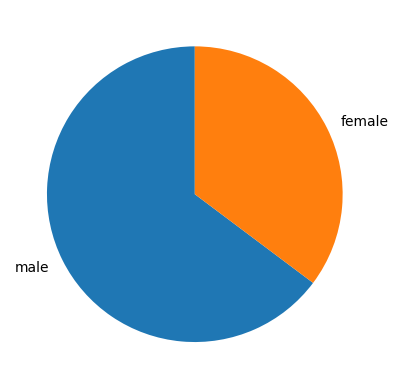

In [13]:
plt.pie(sex_data,labels=sex_data.index,startangle=90)

In [14]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
data[data['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<Axes: >

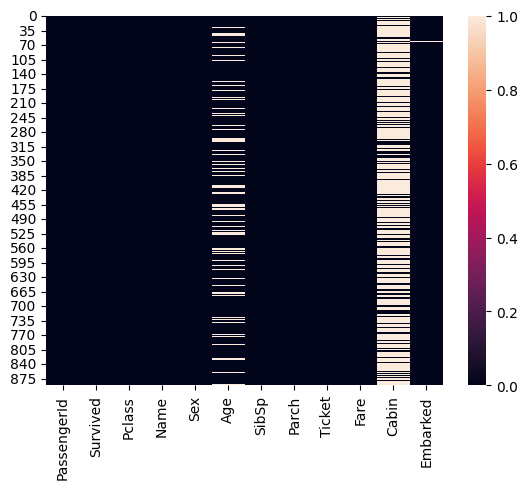

In [16]:
sns.heatmap(data.isnull())

In [17]:
per_missing = data.isnull().sum()*100/len(data)

In [18]:
per_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
data.drop('Cabin',axis=1,inplace = True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [24]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [33]:
data['Age'].value_counts(ascending=False)

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [31]:
data['Age'].nunique()

88

In [34]:
data['Age'].mean()

29.69911764705882

<Axes: xlabel='Age', ylabel='count'>

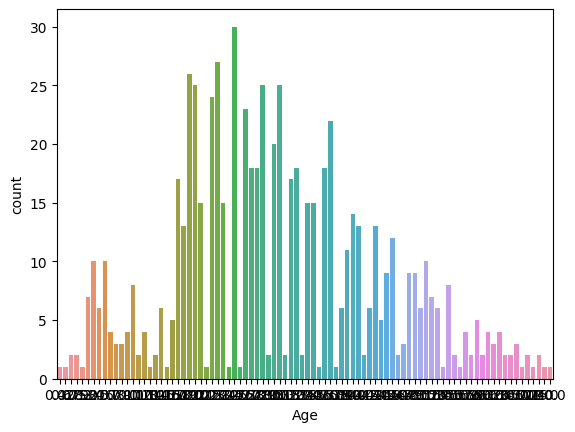

In [35]:
sns.countplot(x='Age',data=data)

In [38]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [39]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [41]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [42]:
data['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [44]:
cat_cols = data.select_dtypes(include=('object')).columns

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
en = LabelEncoder()
for i in cat_cols:
    data[i] = en.fit_transform(data[i])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 66.3 KB


In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,0,22.0,1,0,523,7.2500,0
1,2,1,1,190,1,38.0,1,0,596,71.2833,0
2,3,1,3,353,1,26.0,0,0,669,7.9250,0
3,4,1,1,272,1,35.0,1,0,49,53.1000,0
4,5,0,3,15,0,35.0,0,0,472,8.0500,0


In [49]:
sur = data['Survived'].value_counts()
sur

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

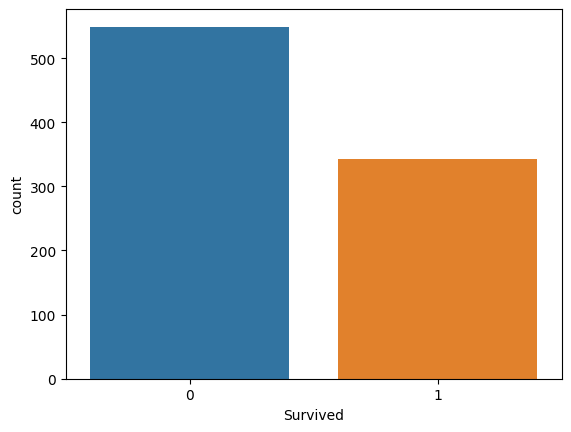

In [56]:
sns.countplot(x='Survived',data=data)

In [58]:
Pclass_anlaysis = data['Pclass'].value_counts()
Pclass_anlaysis

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x28fec122290>,
 [Text(-1.0858746836637898, -0.1757161670935961, '3'),
  Text(0.9714243951954356, -0.5160762002061154, '1'),
  Text(0.6646263698677192, 0.8765111456658483, '2')])

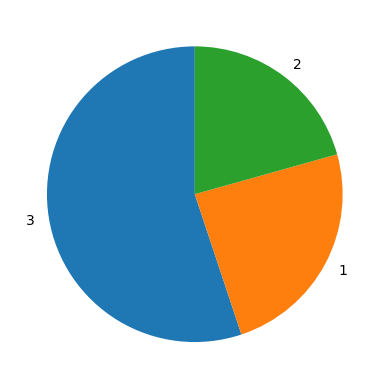

In [59]:
plt.pie(Pclass_anlaysis,labels=Pclass_anlaysis.index,startangle=90)

<Axes: xlabel='Pclass', ylabel='count'>

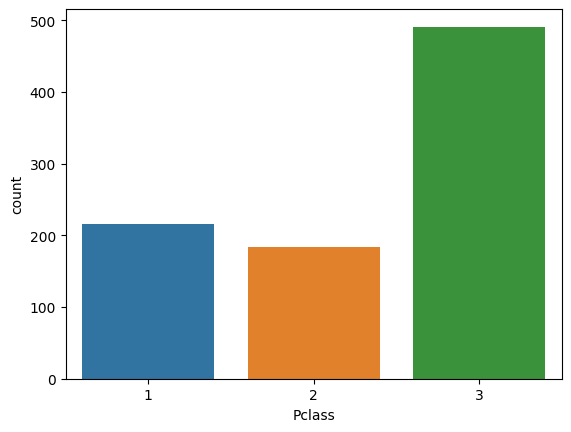

In [60]:
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Age', ylabel='count'>

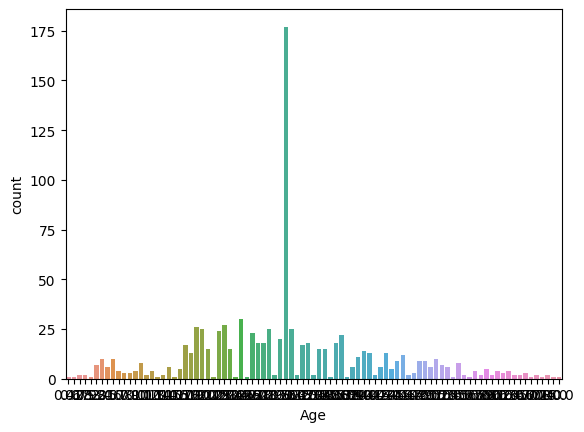

In [61]:
sns.countplot(x='Age',data=data)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

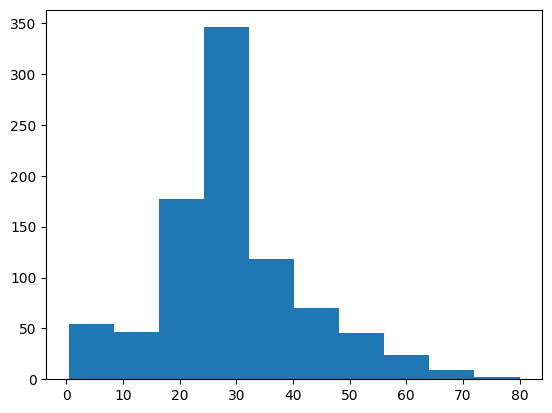

In [63]:
plt.hist(x='Age',data=data)

<Axes: ylabel='Age'>

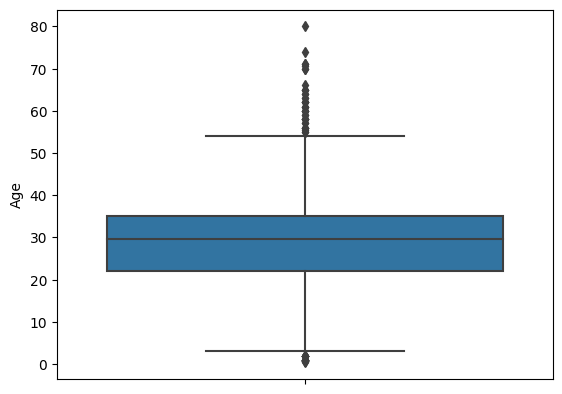

In [65]:
sns.boxplot(y='Age',data=data)

<Axes: xlabel='Sex', ylabel='Survived'>

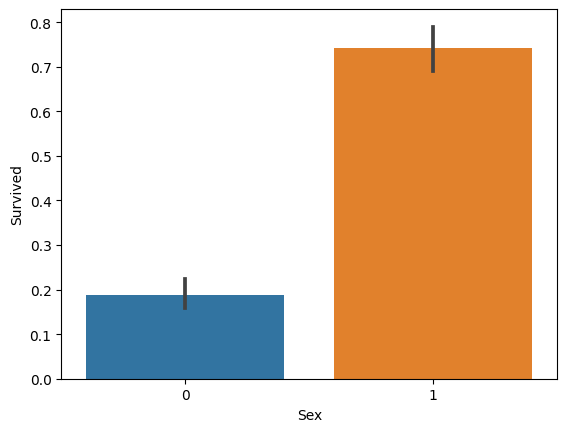

In [67]:
sns.barplot(x='Sex',y='Survived',data=data)

<Axes: xlabel='Pclass', ylabel='Survived'>

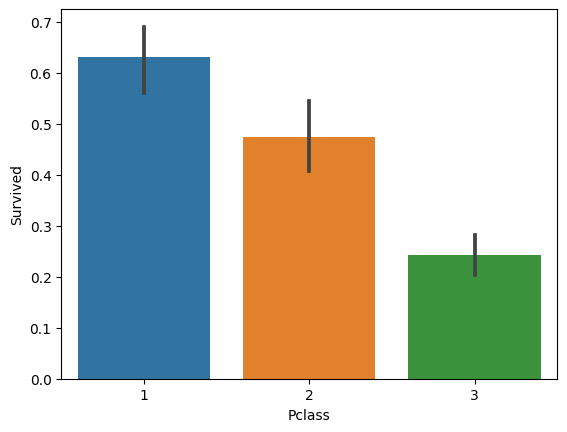

In [68]:
sns.barplot(x='Pclass',y='Survived',data=data)

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,0,22.0,1,0,523,7.2500,0
1,2,1,1,190,1,38.0,1,0,596,71.2833,0
2,3,1,3,353,1,26.0,0,0,669,7.9250,0
3,4,1,1,272,1,35.0,1,0,49,53.1000,0
4,5,0,3,15,0,35.0,0,0,472,8.0500,0


In [70]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
reg.score(x_test,y_test)

0.7877094972067039

In [77]:
y_pred = reg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.7877094972067039

In [89]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,0,22.0,1,0,523,7.2500,0
1,2,1,1,190,1,38.0,1,0,596,71.2833,0
2,3,1,3,353,1,26.0,0,0,669,7.9250,0
3,4,1,1,272,1,35.0,1,0,49,53.1000,0
4,5,0,3,15,0,35.0,0,0,472,8.0500,0


In [93]:
prediction = reg.predict((np.array([[
    2,
    1,
    190,
    1,
    38.0,
    1,
    0,
    523,
    71.2500,
    0
]])))

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [94]:
prediction

array([1], dtype=int64)

In [95]:
input_size = 10
output_size =1
hidden_layer_size =50

In [96]:
import tensorflow as tf

In [97]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
        tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
        tf.keras.layers.Dense(output_size,activation='sigmoid')
        
    ])


In [98]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
epochs = 100
model.fit(x_train,y_train,epochs,verbose=2)

8/8 - 0s - loss: 1.8028 - accuracy: 0.6629 - 63ms/epoch - 8ms/step


In [101]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 1.5146 - accuracy: 0.5922


[1.5145577192306519, 0.5921787619590759]

In [102]:
y_pred2 = model.predict(x_test)
y_pred2

6/6 [==============================] - 0s 4ms/step


array([[9.63541687e-01],
       [1.25429913e-01],
       [8.44419539e-01],
       [9.50023413e-01],
       [1.31757259e-01],
       [9.99970436e-01],
       [1.04014784e-01],
       [3.80696833e-01],
       [6.82751775e-01],
       [9.17141676e-01],
       [9.99876857e-01],
       [2.57495791e-01],
       [7.17248499e-01],
       [6.20463312e-01],
       [9.69162881e-01],
       [6.08731031e-01],
       [9.99843240e-01],
       [9.53230381e-01],
       [2.79841721e-01],
       [9.99430835e-01],
       [5.54775476e-01],
       [7.61086702e-01],
       [9.89878893e-01],
       [4.57709700e-01],
       [9.90923464e-01],
       [9.98549819e-01],
       [2.81789098e-02],
       [8.22193801e-01],
       [7.33368797e-03],
       [8.36246252e-01],
       [9.06335056e-01],
       [1.15940832e-02],
       [4.83614117e-01],
       [1.27048761e-01],
       [7.35888422e-01],
       [9.59014535e-01],
       [9.99984145e-01],
       [7.07194805e-01],
       [9.99475539e-01],
       [8.28667819e-01],


In [106]:
y_pred2=np.where(y_pred2>0.5,1,0)
y_pred2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7877094972067039